#Stationary property

# Introduction
In this lecture, we discussed about the concept of ***stationary time series***. This important concept will lay the necessary foundation for understanding time series modeling strategies. we will focus on :
1. What is Stationarity ?
2. How to identify stationary data
3. Non-stationary data
4. How to convert non-stationary data to stationary data



In [ ]:
# Make sure the statsmodel is the latest version
!pip install statsmodels -U

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [ ]:
from datetime import datetime
import numpy as np             
import pandas as pd            
import matplotlib.pylab as plt 
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# We will use the same air passenger data
!wget https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/AirPassengers.csv

--2021-07-18 10:03:15--  https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/AirPassengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [text/plain]
Saving to: ‘AirPassengers.csv.1’

AirPassengers.csv.1 100%[===================>]   1.71K  --.-KB/s    in 0s      

2021-07-18 10:03:15 (26.4 MB/s) - ‘AirPassengers.csv.1’ saved [1746/1746]



# Section 1: Stationary Time Series

In this section, we will generate simple stationary time serie data and discuss the various aspects for a time series to be stantionary.

### What is Stationarity?
In order for time series data to be stationary, the data must exhibit four properties over time:
1. constant mean
2. constant variance
3. constant autocorrelation structure
4. no seasonality



In [ ]:
# Let's first create a stationary time series (random noise)
window = 15
scale_val = 1

time = np.arange(100)
stationary = np.random.normal(loc=0, scale=scale_val, size=len(time))
stationary = pd.Series(stationary)

# Section 2: Stationary Identification
In this section, we will show how to identify stationary time series data by :
1. mean and variance from sliding window 
2. histogram
3. augmented Dicky-Fuller test 
4. autocorrelation

## Contant Mean, Constant Variance

In [ ]:
# compute rolling means and std over a window size
mean_a = stationary.rolling(window=window).mean()
mean_a = mean_a.dropna()
std_a = stationary.rolling(window=window).std()
std_a = std_a.dropna()

When we compute the mean and standard deviation of the time series, they should be roughly the same over time.

In [ ]:
print("DATA first 20")
print(np.array(stationary)[:20])
print("MEAN first 10 windows")
print(np.array(mean_a)[:10])
print("STD first 10 windows")
print(np.array(std_a)[:10])

DATA first 20
[-0.67004616  1.40983889 -1.07955716 -0.41878862 -0.29912855  0.11403286
  0.23450772  1.94871029  0.82018358 -1.72379243 -0.50326391 -0.38754333
 -0.34613584  0.67640444  0.98594665 -0.3953546   0.84257178  0.36612753
  0.69004414  1.13391641]
MEAN first 10 windows
[ 0.0507579   0.06907067  0.03125286  0.12763184  0.20155402  0.29709035
  0.31892969  0.31731409  0.0293429  -0.18187964]
STD first 10 windows
[0.97434177 0.96233399 0.91590726 0.86533702 0.86268183 0.88239883
 0.88159811 0.88178605 1.00734998 1.15153301]


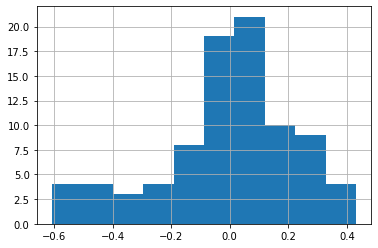

In [ ]:
# The histogram of mean values are highly concentrated around a certain value.
mean_a.hist()

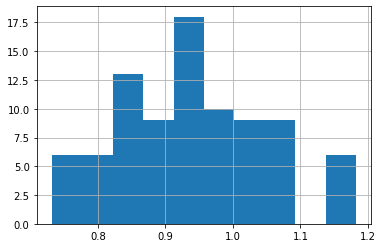

In [ ]:
# The histogram of std values are highly concentrated around a certain value.
std_a.hist()

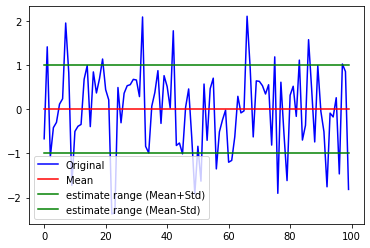

In [ ]:
# A running plot of the mean and variances show that they are pretty much constant
plt.plot(np.arange(len(stationary)),np.array(stationary), color='blue', label='Original')
plt.plot(np.arange(len(stationary)),np.zeros(len(stationary)), color='red', label='Mean')
plt.plot(np.arange(len(stationary)),scale_val*np.ones(len(stationary)), color='green', label='estimate range (Mean+Std)')
plt.plot(np.arange(len(stationary)),-scale_val*np.ones(len(stationary)), color='green', label='estimate range (Mean-Std)')
plt.legend(loc='best')
plt.show()

## Histogram

Another method to check for stationary is to look at the histogram of the values. If they look Normally distributed (bell curve), it is likely to be stationary.

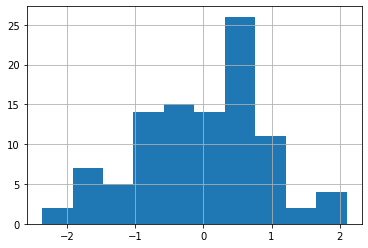

In [ ]:
pd.Series(stationary).hist();

## Augmented Dickey-Fuller 

ADF test is a hypothesis test that checks for stationary by looking at the autocorrelation.

1. **Null hypothesis:** the series is nonstationary.
2. **Alternative hypothesis:** the series is stationary.

Thus, if the p-value is small, the time series is stationary according to the ADF test.

Note, the ADF usually fails to rule out trends, and it should be used in conjunction with other methods.

In [ ]:
print('Results of Dickey Fuller Test:')
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(stationary, autolag='AIC')
dftest = adfuller(stationary, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -9.148631e+00
p-value                        2.724491e-15
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


**ADF** is the value of the test statistic. The more negative the value, the more confident we can be that the series is stationary. Here we see a value of -9. This is much smaller than the critical value of 5%, so we can reject the Null at significance level of 0.05. 

The **critical_values** variable provides test statistic threholds for common significant levels.

In [ ]:
print(critical_values)

{'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


The **p-value** is interpreted like any p-value. Once we set a threshold, we can compare this p-value to that threshold. Either we reject or fail to reject the null. Here **p-value** is very close to zero so we reject the null that this data is nonstationary.

In [ ]:
print(pvalue)

2.7244911422371176e-15


The variable **nobs** is simply the number of observations in the time series

In [ ]:
print(nobs)

99


## Autocorrelation function (ACF) 

Autocorrealation measures how the values in the series are correlated with the past. For example today's weather is highly correlated with yesterday's weather.

A stationary time series usually have non-significant autocorrelations besides lag=0.

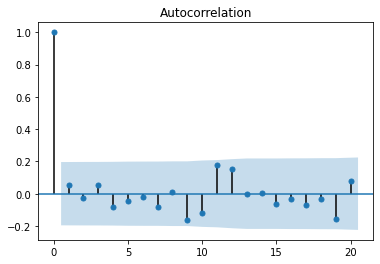

In [ ]:
# Every autocorrelation value are within the blue box, meaning that the
# autocorrelation values are not statistically significant.
plot_acf(stationary)
plt.show()

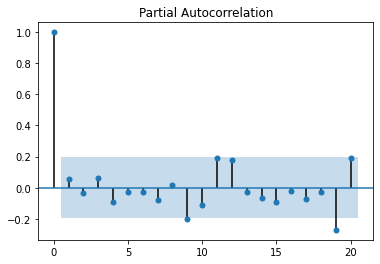

In [ ]:
# Partial autocorrelation plot is very similar to the autocorrelation plot, but
# it removes the effect from other lags (indirect correlation).
plot_pacf(stationary)
plt.show()

#Section 3: Non-stationary 
In this section, we will show examples of non-stationary data. 

### Autocorrelation check for non-stationary

In [ ]:
# seed to start series
seed = 3.14

# Let's create a data that is autocorrelated
# The current value depends on the previous value
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t]

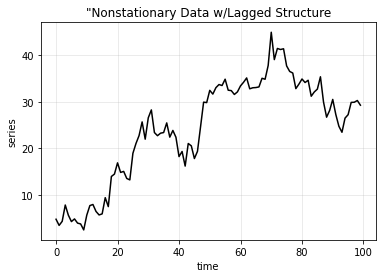

In [ ]:
plt.plot(time, lagged, 'k-')
plt.title('"Nonstationary Data w/Lagged Structure')
plt.xlabel('time')
plt.ylabel('series')
plt.grid(alpha=0.3);
plt.show()

This data have high autocorrelation (outside of lag 0) and should not be stationary.

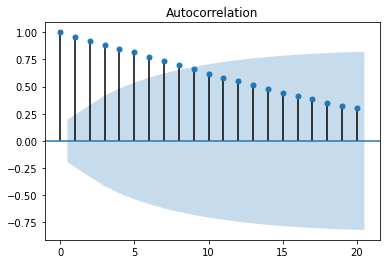

In [ ]:
plot_acf(lagged)
plt.show()

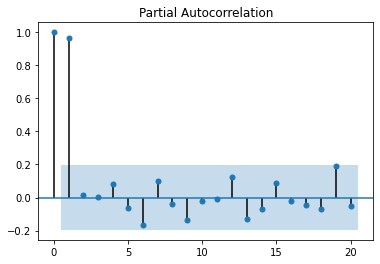

In [ ]:
plot_pacf(lagged)
plt.show()

The ADF test also comes out as not statistically significant.

In [ ]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(lagged, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -1.788209
p-value                         0.386331
#Lags Used                      0.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


To drive that point home, let's discuss some ways to generate nonstationary time series:
1. **Trend** (changing mean)
2. **Heteroscedasticity** (changing variance)
3. **Seasonality** (periodic component)
4. **Trend + Seasonality**


## Trend

In [ ]:
# create a simple data with trend
trend = (time * 2.75) + stationary # stationary is our random noise

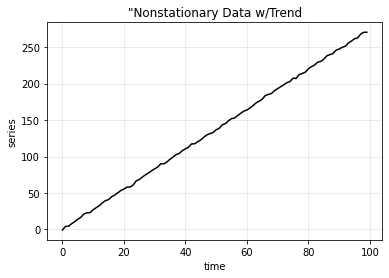

In [ ]:
plt.plot(time, trend, 'k-')
plt.title('"Nonstationary Data w/Trend')
plt.xlabel('time')
plt.ylabel('series')
plt.grid(alpha=0.3);
plt.show()

---

## Heteroscedasticity

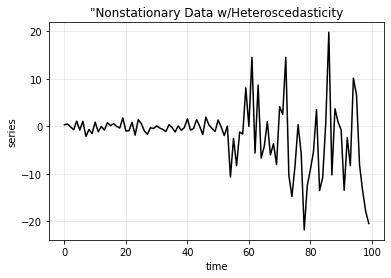

In [ ]:
# reproducibility
np.random.seed(1412)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size = 50)
level_2 = np.random.normal(loc=0, scale=10.0, size = 50)
heteroscedasticity = np.append(level_1, level_2)

plt.plot(time, heteroscedasticity, 'k-')
plt.title('"Nonstationary Data w/Heteroscedasticity')
plt.xlabel('time')
plt.ylabel('series')
plt.grid(alpha=0.3);
plt.show()

---

## Seasonality

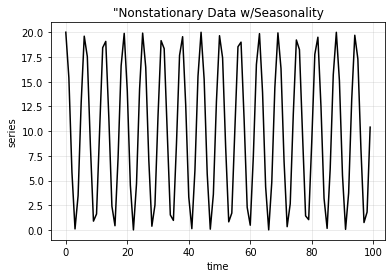

In [ ]:
seasonality = 10 + np.cos(time) * 10

plt.plot(time, seasonality, 'k-')
plt.title('"Nonstationary Data w/Seasonality')
plt.xlabel('time')
plt.ylabel('series')
plt.grid(alpha=0.3);
plt.show()

---

## Trend + Seasonality

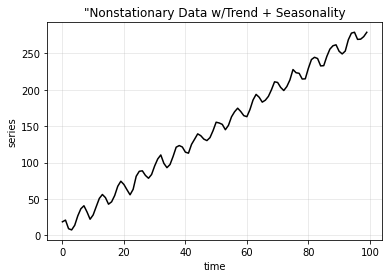

In [ ]:
trend_seasonality = trend + seasonality + stationary

plt.plot(time, trend_seasonality, 'k-')
plt.title('"Nonstationary Data w/Trend + Seasonality')
plt.xlabel('time')
plt.ylabel('series')
plt.grid(alpha=0.3);
plt.show()

**Question:** From the previou four time series, show evidenve of why they are not stationary.


**Answer:** 

---

#Section 4: converting to stationary
In this section, we will try convert non-stationary data **(Air-Passengers dataset)**  to stationary data by using different transformation techniques. 

In [ ]:
path = "AirPassengers.csv" 
dataset = pd.read_csv(path)
#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = dataset.set_index(['Month'])
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# This is a function that computes rolling statistics and performs ADF test.

def test_stationarity(timeseries, window=12, main_col_name='#Passengers', autolag='AIC'):
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=window).mean()
    movingSTD = timeseries.rolling(window=window).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    mean_plus_std = plt.plot(movingAverage + movingSTD, color='green', label='estimate range (Mean+Std)')
    mean_minus_std = plt.plot(movingAverage - movingSTD, color='green', label='estimate range (Mean-Std)')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries[main_col_name], autolag=autolag)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

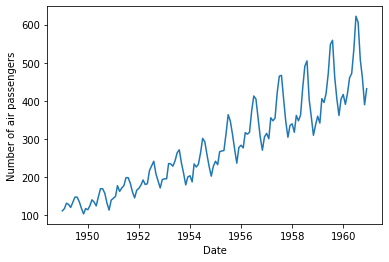

In [ ]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

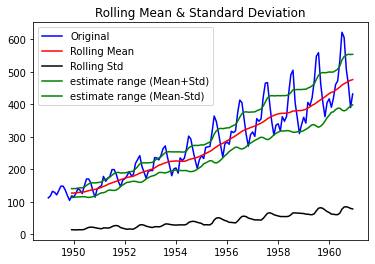

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(indexedDataset)

**Question:** Why is this data not stationary?


**Answer:** 

---

## Transformation (log)

Applying the log can help reduce the different in difference in variance found in multiplicative time series.

You might add 1 to your data before taking the log if your data has zeroes.

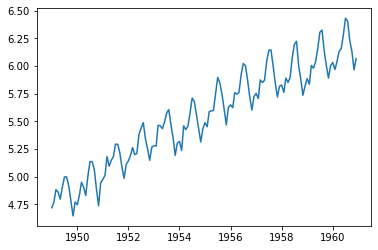

In [ ]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)
plt.show()

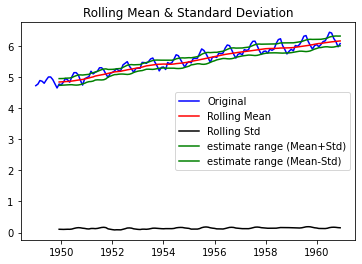

Results of Dickey Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(indexedDataset_logScale)

## Differencing with moving average

Moving average is another common transformation technique that can smooth out fluctuations in the data. See next lecture for more detials.

Here we use this technique to get the trend of the data so that we can remove it by substracting from the original.


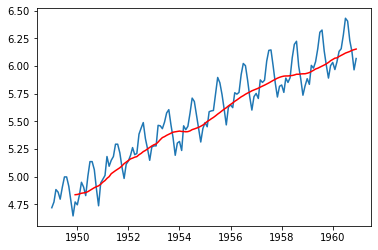

In [ ]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

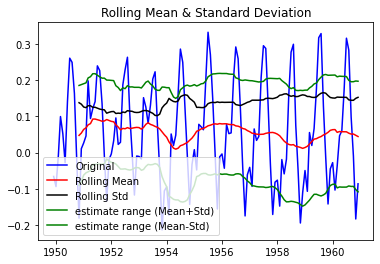

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)
test_stationarity(datasetLogScaleMinusMovingAverage)

## Difference with exponetial moving average

Exponential moving average is very similar to simple moving average but it weights more recent values more heavily. See next lecture for more detials.

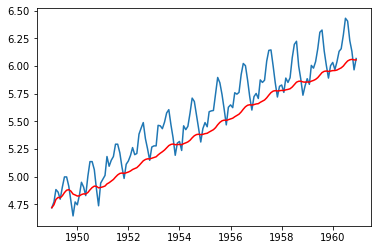

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

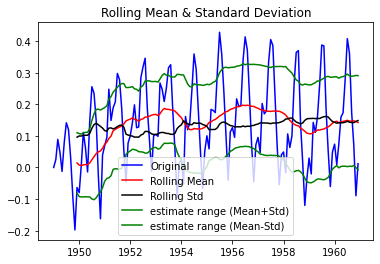

Results of Dickey Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

## Difference with time lagged data

Differencing with a time lagged version of the data is also a common technique for removing trend and autocorrelation.

Here we use [pandas.DataFrame.shift()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) to shift the time index by one.



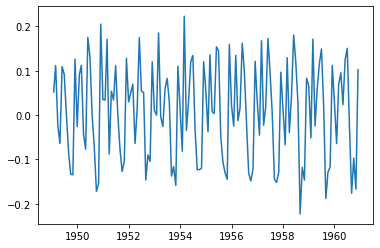

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

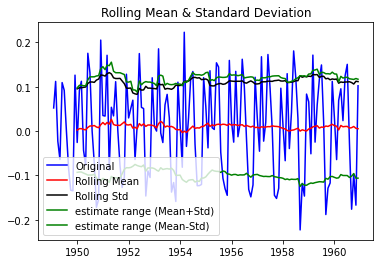

Results of Dickey Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

## Difference with seasonal

The previous methods mostly remove trends. To deal with seasonality we can differentiate the series with the lag of size = peroid of the seasonal component

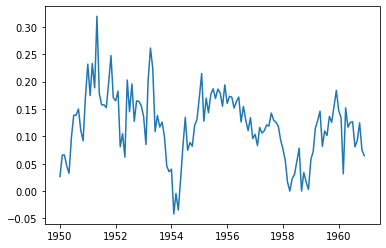

In [ ]:
# Here we shift with lag = 12
datasetLogSeasonalShifting = indexedDataset_logScale - indexedDataset_logScale.shift(periods=12)
plt.plot(datasetLogSeasonalShifting)

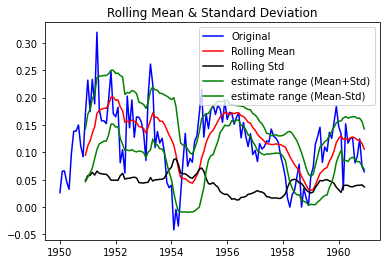

Results of Dickey Fuller Test:
Test Statistic                  -2.709577
p-value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
datasetLogSeasonalShifting.dropna(inplace=True)
test_stationarity(datasetLogSeasonalShifting)

Another method to remove seasonality is to first extract the seasonal component then substract them.

When we took the log of the time series, this data is now an additive one.

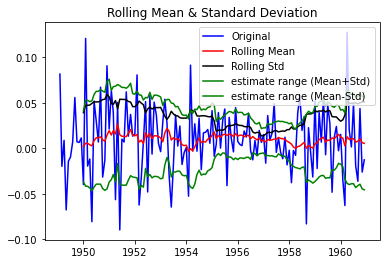

Results of Dickey Fuller Test:
Test Statistic                -6.580916e+00
p-value                        7.518314e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.350000e+02
Critical Value (1%)           -3.479743e+00
Critical Value (5%)           -2.883198e+00
Critical Value (10%)          -2.578320e+00
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=datasetLogDiffShifting['#Passengers'], model='additive', period=12)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

datasetLogDiffShifting_SS  = datasetLogDiffShifting
datasetLogDiffShifting_SS['#Passengers'] = datasetLogDiffShifting['#Passengers'] - ss_decomposition.seasonal
datasetLogDiffShifting_SS.head()
test_stationarity(datasetLogDiffShifting_SS)


## Conclusion
After we finished converting the non-stationary data to a stationary one, we can start doing analysis or prediction. If we perform prediction on the transformed time series, we can undo the transformations to get the final prediction.

For example, if we performed the log transformation, we have to take the exponent.